In [17]:
%matplotlib inline

In [16]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

In [15]:
import seaborn as sns
sns.set(color_codes=True)

In [60]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
setosa = iris[iris.species == 'setosa']
versicolor = iris[iris.species == 'versicolor']
virginica = iris[iris.species == 'virginica']

### Potential solution approaches: Feature Engineering

In [7]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
iris.species.value_counts()
# means data in balanced

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

## Q. Predicate the 'species'

In [ ]:
iris.groupby('species').describe()

In [21]:
data = iris.groupby('species').agg(['mean', 'std'])

In [13]:
iris.groupby('species').agg(['mean', 'std', 'max', 'min'])

sepal_length                     sepal_width                      \
                   mean       std  max  min        mean       std  max  min   
species                                                                       
setosa            5.006  0.352490  5.8  4.3       3.428  0.379064  4.4  2.3   
versicolor        5.936  0.516171  7.0  4.9       2.770  0.313798  3.4  2.0   
virginica         6.588  0.635880  7.9  4.9       2.974  0.322497  3.8  2.2   

           petal_length                     petal_width                      
                   mean       std  max  min        mean       std  max  min  
species                                                                      
setosa            1.462  0.173664  1.9  1.0       0.246  0.105386  0.6  0.1  
versicolor        4.260  0.469911  5.1  3.0       1.326  0.197753  1.8  1.0  
virginica         5.552  0.551895  6.9  4.5       2.026  0.274650  2.5  1.4

In [23]:
data

sepal_length           sepal_width           petal_length  \
                   mean       std        mean       std         mean   
species                                                                
setosa            5.006  0.352490       3.428  0.379064        1.462   
versicolor        5.936  0.516171       2.770  0.313798        4.260   
virginica         6.588  0.635880       2.974  0.322497        5.552   

                     petal_width            
                 std        mean       std  
species                                     
setosa      0.173664       0.246  0.105386  
versicolor  0.469911       1.326  0.197753  
virginica   0.551895       2.026  0.274650

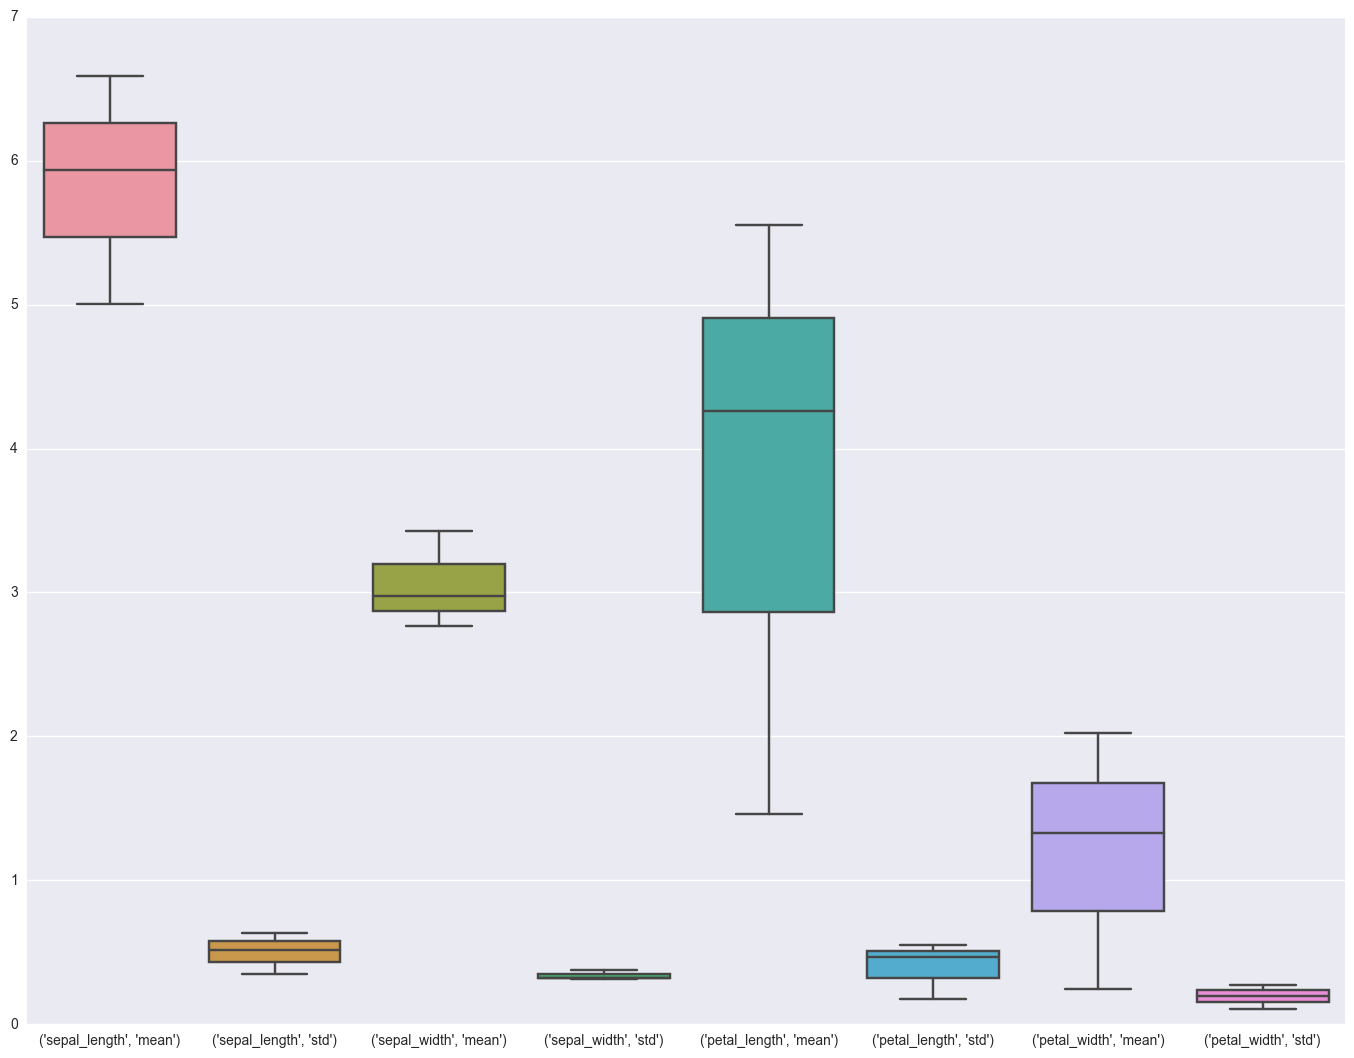

In [41]:
plt.subplots(figsize=(17, 13))
sns.boxplot(data=data)

In [29]:
plt.figure(figsize=(16, 6))
for i, v in enumerate

SyntaxError: invalid syntax (<ipython-input-29-603fc1b385cc>, line 2)

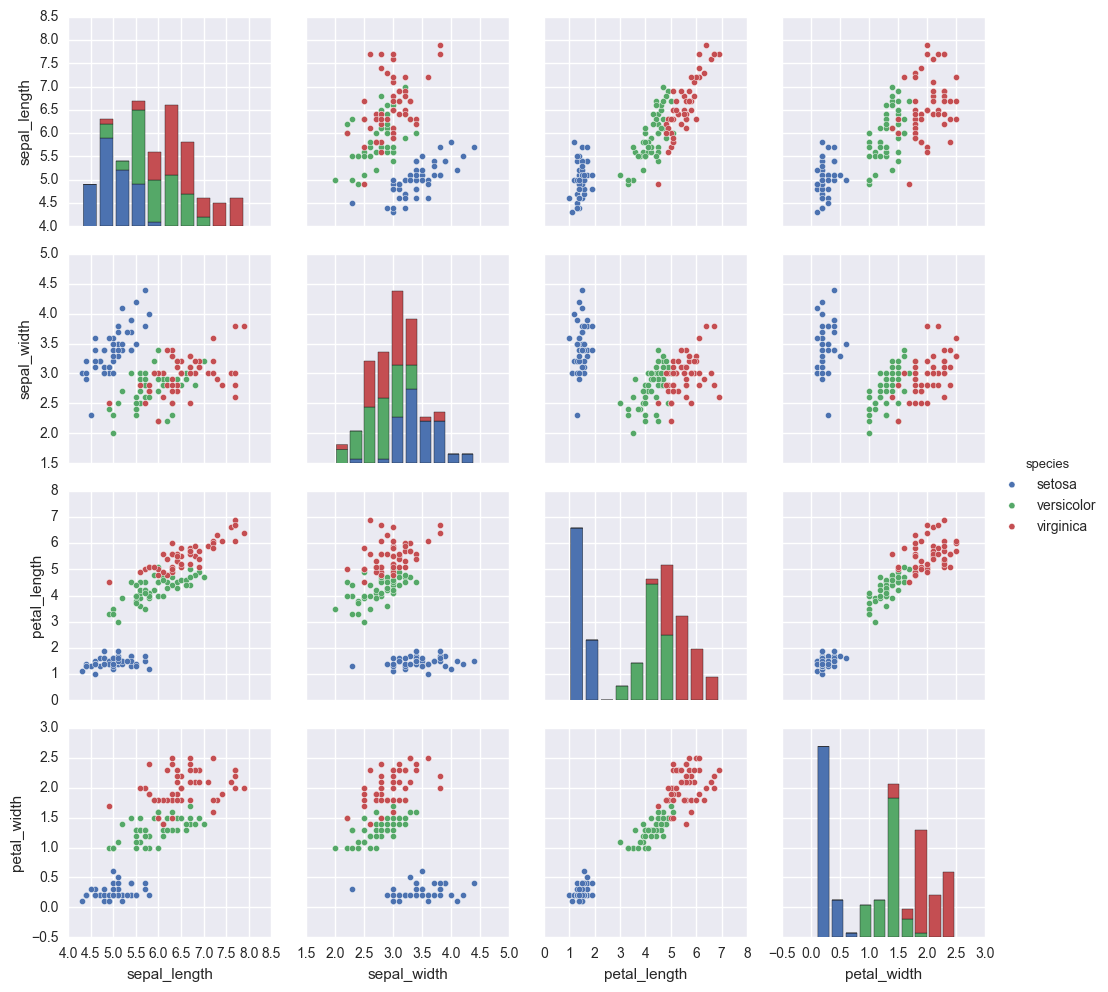

In [31]:
sns.pairplot(iris, hue='species')

In [61]:
iris['petal_area'] = iris['petal_length'] * iris['petal_width']
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,petal_area
0,5.1,3.5,1.4,0.2,setosa,0.28
1,4.9,3.0,1.4,0.2,setosa,0.28
2,4.7,3.2,1.3,0.2,setosa,0.26
3,4.6,3.1,1.5,0.2,setosa,0.30
4,5.0,3.6,1.4,0.2,setosa,0.28


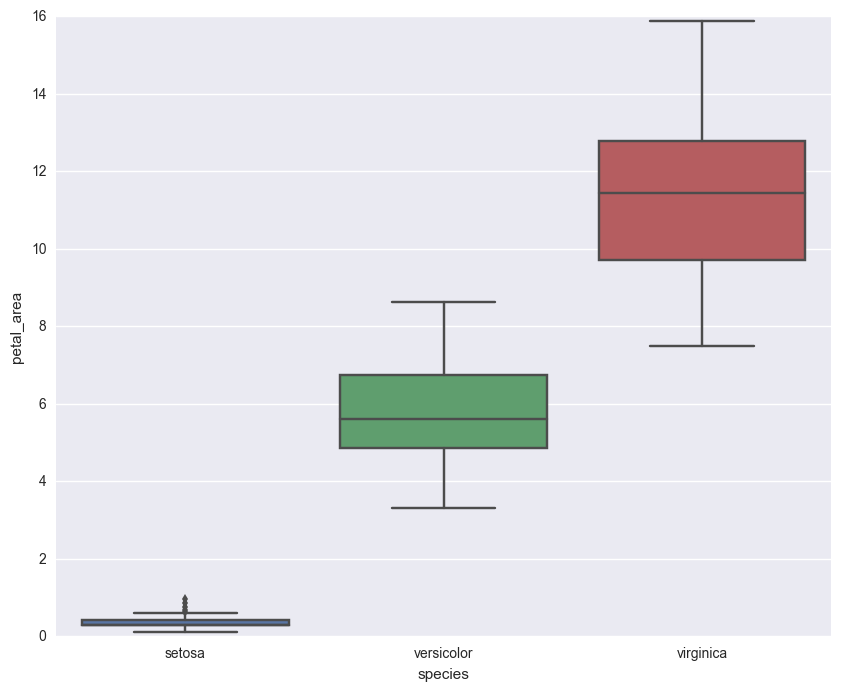

In [44]:
plt.subplots(figsize=(10, 8))
sns.boxplot(x='species', y='petal_area', data=iris)

# Machine learning is feature engineering

### KNeighborsClassifier

In [106]:
# X = iris.ix[:,['petal_area']]
X = iris.ix[:,['petal_length', 'petal_width', 'sepal_length', 'sepal_width']]
y = iris.ix[:,'species']

In [107]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier(weights='distance') # KNeighborsClassifier()
model.fit(X,y)
accuracy_score(model.predict(X), y)

1.0

In [64]:
model.fit?

### Linear Regression

### Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X, y)
accuracy_score(model.predict(X), y)

0.95999999999999996

In [104]:
X = iris.ix[:,['petal_length', 'petal_width', 'sepal_length', 'sepal_width']]

### DecisionTreeClassifier

In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()
model.fit(X, y)
accuracy_score(model.predict(X), y)

1.0

### RandomForestClassifier

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X, y)
accuracy_score(model.predict(X), y)

1.0

### GaussianNB

In [97]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

model = GaussianNB()
model.fit(X, y)
accuracy_score(model.predict(X), y)

0.95999999999999996

# Train - Test - Split

In [112]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.5)

model = KNeighborsClassifier(weights='distance') # KNeighborsClassifier()
model.fit(trainX, trainY)
accuracy_score(model.predict(testX), testY)

0.97333333333333338

### Support Vector Classifier Algorithms